# ATMOS 2022 - Population Analysis

-----------

## 0. Import Libraries

In [1]:
import matplotlib.pyplot as plt
import proplot

from data import *
from utils import *
from visualization_codes import *

%load_ext autoreload
%autoreload 2
%reload_ext autoreload

## 1. Open Data

In [2]:
cities = get_turkish_city_names()

In [3]:
cities

array(['adana', 'adiyaman', 'afyonkarahisar', 'agri', 'amasya', 'ankara',
       'antalya', 'artvin', 'aydin', 'balikesir', 'bilecik', 'bingol',
       'bitlis', 'bolu', 'burdur', 'bursa', 'canakkale', 'cankiri',
       'corum', 'denizli', 'diyarbakir', 'edirne', 'elazig', 'erzincan',
       'erzurum', 'eskisehir', 'gaziantep', 'giresun', 'gumushane',
       'hakkari', 'hatay', 'isparta', 'mersin', 'istanbul', 'izmir',
       'kars', 'kastamonu', 'kayseri', 'kirklareli', 'kirsehir',
       'kocaeli', 'konya', 'kutahya', 'malatya', 'manisa',
       'kahramanmaras', 'mardin', 'mugla', 'mus', 'nevsehir', 'nigde',
       'ordu', 'rize', 'sakarya', 'samsun', 'siirt', 'sinop', 'sivas',
       'tekirdag', 'tokat', 'trabzon', 'tunceli', 'sanliurfa', 'usak',
       'van', 'yozgat', 'zonguldak', 'aksaray', 'bayburt', 'karaman',
       'kirikkale', 'batman', 'sirnak', 'bartin', 'ardahan', 'igdir',
       'yalova', 'karabuk', 'kilis', 'osmaniye', 'duzce'], dtype=object)

In [59]:
province = ['istanbul', 'ankara', 'izmir']
dt = retrieve_population(province)

In [34]:
dt

,Province,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,ankara,3889199,3971642,4050309,4128889,4210596,4294678,4380736,4466756,4548939,...,4771716,4890893,4965542,5045083,5150072,5270575,5346518,5445026,5503985,5639076
1,istanbul,11076840,11292009,11495948,11699172,11910733,12128577,12351506,12573836,12697164,...,13255685,13624240,13854740,14160467,14377018,14657434,14804116,15029231,15067724,15519267
2,izmir,3431204,3477209,3519233,3560544,3603838,3648575,3694316,3739353,3795978,...,3948848,3965232,4005459,4061074,4113072,4168415,4223545,4279677,4320519,4367251


## 2. Population Line Plot

/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/proplot/ui.py:406: ProPlotWarning: You specified both figsize=(6, 4) and axwidth=1.5. Ignoring 'axwidth'.
/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/proplot/axes/plot.py:507: MatplotlibDeprecationWarning: 
The IndexFormatter class was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  kw[xname + 'formatter'] = mticker.IndexFormatter(x)
/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/proplot/axes/plot.py:507: MatplotlibDeprecationWarning: 
The IndexFormatter class was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  kw[xname + 'formatter'] = mticker.IndexFormatter(x)
/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/proplot/axes/plot.py:507: MatplotlibDeprecationWarning: 
The IndexFormatter class was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  kw[xn

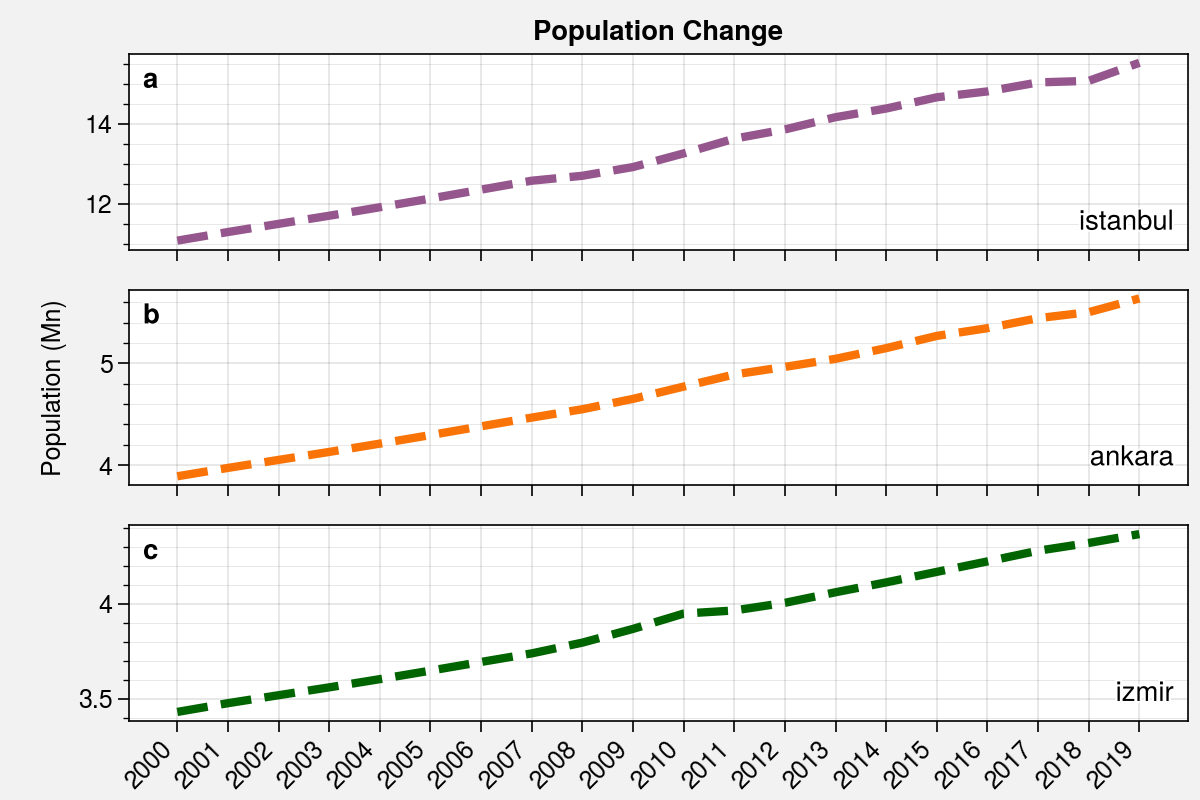

In [108]:
method = 'lineplot'
population_line_plot(dt, method)

## 3. Ratio of City Population to Whole Population (%)

### 3.1 Open Dataset

In [136]:
# create column named total
total_col = ['total']

# merge province and total columnc together
province_total = province + total_col

# get the whole turkey population data
turkey_dt = retrieve_population(list(cities))
turkey_dt.set_index('Province', inplace=True)
turkey_dt = turkey_dt.transpose()

# find the total population bu summing up each city
turkey_dt.loc[:, total_col] = turkey_dt.sum(axis=1)

In [137]:
province_total

['istanbul', 'ankara', 'izmir', 'total']

### 3.2 Calculate the Ratio

In [138]:
# copy new dataframe with province and total colum names
perc_dt = turkey_dt[province_total].copy(deep=True)

# find the Ratio of Each City's Population
# to Whole Population For Each Year (%)
for p in province:
    
    # apply the find_percentage function to each city
    perc_dt[fr'perc_{p}'] = turkey_dt.apply(lambda row: find_percentage(
                                                                row,
                                                                p,
                                                                total_col),
                                                                axis=1)

In [139]:
# percent variables
perc_province = ['perc_istanbul',
                 'perc_ankara',
                 'perc_izmir']

# adjust data to plotting
perc_dt = perc_dt[perc_province] \
            .transpose().reset_index()
perc_dt['Province'] = perc_dt['Province'] \
                        .str \
                        .replace('perc_', '')

In [140]:
perc_dt

,Province,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,istanbul,17.112505,17.212599,17.312691,17.412785,17.513152,17.613246,17.713340,17.813434,17.754025,...,17.980396,18.232684,18.319740,18.469886,18.504216,18.614729,18.548067,18.598111,18.374403,18.663060
1,ankara,6.008387,6.054041,6.099693,6.145346,6.191123,6.236776,6.282429,6.328082,6.360631,...,6.472494,6.545254,6.565799,6.580440,6.628499,6.693554,6.698649,6.738016,6.711859,6.781404
2,izmir,5.300835,5.300368,5.299902,5.299434,5.298966,5.298499,5.298032,5.297565,5.307791,...,5.356332,5.306485,5.296308,5.296970,5.293808,5.293827,5.291677,5.295940,5.268676,5.251941


/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/proplot/ui.py:406: ProPlotWarning: You specified both figsize=(6, 4) and axwidth=1.5. Ignoring 'axwidth'.
/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/proplot/axes/plot.py:507: MatplotlibDeprecationWarning: 
The IndexFormatter class was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  kw[xname + 'formatter'] = mticker.IndexFormatter(x)
/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/proplot/axes/plot.py:507: MatplotlibDeprecationWarning: 
The IndexFormatter class was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  kw[xname + 'formatter'] = mticker.IndexFormatter(x)
/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/proplot/axes/plot.py:507: MatplotlibDeprecationWarning: 
The IndexFormatter class was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  kw[xn

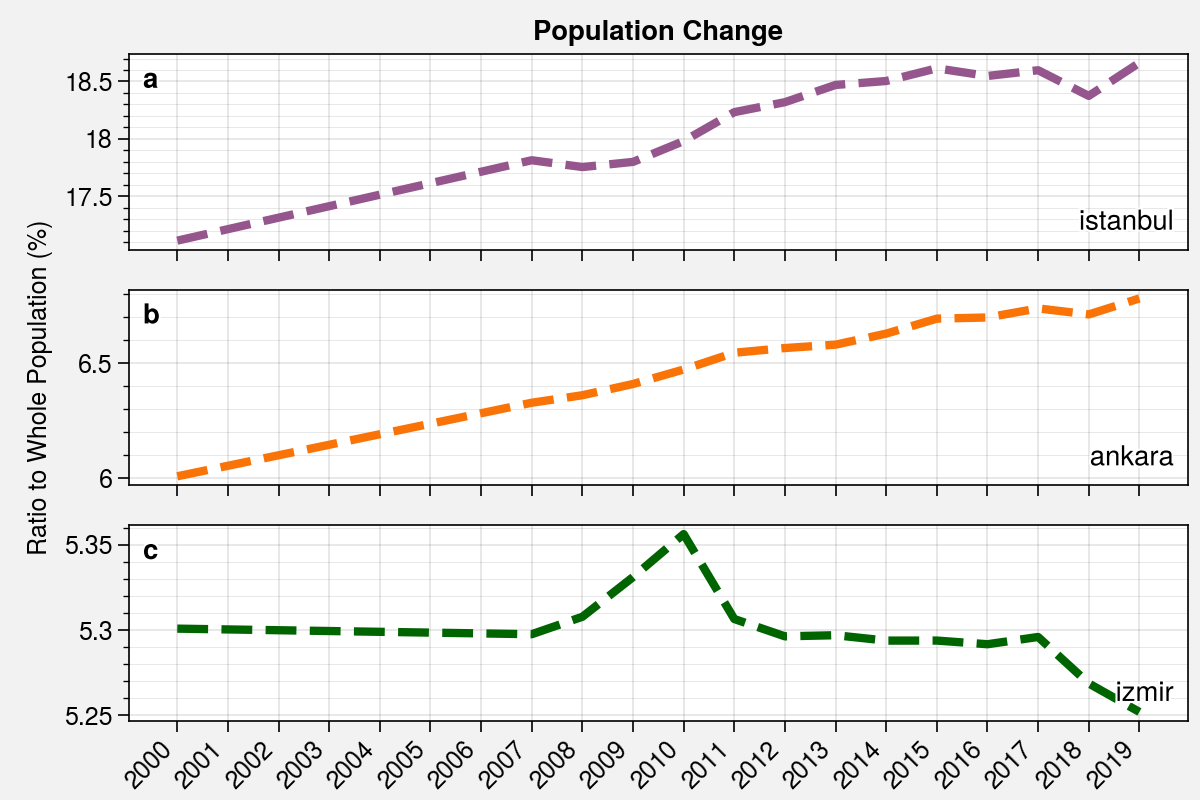

In [141]:
# determine the method (to give name the figure saving)
method = 'ratio'

# plot the lineplot graphic
population_line_plot(perc_dt, method)

## 4. Rate of Change of Population 

* 2000 to 2019

In [142]:
# define initial and ending year
init_year = 2000
end_year = 2019

# calculate rate of change of population from 2000 to 2019 in percentage (%)
roc = {}
for p in province:
    
    # apply roc calculation function
    roc[p] = find_rate_of_change(turkey_dt[province_total], 
                        init_year,
                        end_year,
                        p)

In [143]:
# percent population change from 2000 to 2019
roc_df = pd.DataFrame(roc, index = ['roc'])
roc_df

,istanbul,ankara,izmir
roc,40.105545,44.993249,27.280424
